# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Aluno**: Chrystian Arriel Amaral

**Matricula**: 201920890

**Turma**: 14A

Link do repositório GitHub: https://github.com/chrystian9/EFC-CPA

● O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

● Trabalhos entregues após a data limite não serão aceitos

● Data limite de entrega: 24 de Julho de 2022 : 23h55m

● Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

● O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações e Variáveis globais

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import statistics

global_1=0

# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


In [2]:
def insertionSort(arranjo):
  inicial = time.time()
  contadorDeInteracoes = 0
  for j in range (1,len(arranjo)):
    chave = arranjo[j]
    i = j - 1
    while i>=0 and arranjo[i]>chave:
      arranjo[i+1] = arranjo[i]
      i = i - 1
      contadorDeInteracoes += 1
    
    arranjo[i+1]=chave
  
  fim = time.time()
  tempo_exec = fim - inicial
  
  return arranjo, tempo_exec, contadorDeInteracoes

##  Merge Sort


In [3]:
## Algoritmo retirado de: https://www.geeksforgeeks.org/python-program-for-merge-sort/#:~:text=Merge%20Sort%20is%20a%20Divide,assumes%20that%20arr%5Bl..

def merge(arr, l, m, r, contadorDeInteracoes):
  n1 = m - l + 1
  n2 = r - m

  L = [0] * (n1)
  R = [0] * (n2)

  for i in range(0, n1):
    L[i] = arr[l + i]

  for j in range(0, n2):
    R[j] = arr[m + 1 + j]

  i = 0
  j = 0
  k = l

  while i < n1 and j < n2:
    if L[i] <= R[j]:
      arr[k] = L[i]
      i += 1
    else:
      arr[k] = R[j]
      j += 1
    k += 1
    contadorDeInteracoes += 1

  while i < n1:
    arr[k] = L[i]
    i += 1
    k += 1
    contadorDeInteracoes += 1

  while j < n2:
    arr[k] = R[j]
    j += 1
    k += 1
    contadorDeInteracoes += 1

  return contadorDeInteracoes

def mergeSortRecursivo(arr, l, r, contadorDeInteracoes):
  if l < r:
    m = l+(r-l)//2

    contadorDeInteracoes = mergeSortRecursivo(arr, l, m, contadorDeInteracoes)
    contadorDeInteracoes = mergeSortRecursivo(arr, m+1, r, contadorDeInteracoes)
    contadorDeInteracoes = merge(arr, l, m, r, contadorDeInteracoes)

  return contadorDeInteracoes

def mergeSort(A):
  inicial = time.time()
  contadorDeInteracoes = 0

  contadorDeInteracoes = mergeSortRecursivo(A, 0, len(A)-1, contadorDeInteracoes)
  
  fim = time.time()
  tempo_exec = fim - inicial
  
  return A, tempo_exec, contadorDeInteracoes

##  Selection Sort


In [4]:
def selectionSort(A):
  inicial = time.time()
  contadorDeInteracoes = 0
  for i in range(0, len(A)-1):
    menor = i
    for j in range(i+1, len(A)):
      if A[j] < A[menor]:
        contadorDeInteracoes += 1
        menor = j
    
    aux = A[menor]
    A[menor] = A[i]
    A[i] = aux

  fim = time.time()
  tempo_exec = fim - inicial

  return A, tempo_exec, contadorDeInteracoes

##  Bubble Sort


In [5]:
## Algoritmo retirado de: https://panda.ime.usp.br/panda/static/pythonds_pt/05-OrdenacaoBusca/OBubbleSort.html

def bubbleSort(A):
  inicial = time.time()
  contadorDeInteracoes = 0
  
  for passnum in range(len(A)-1,0,-1):
    for i in range(passnum):
      if A[i]>A[i+1]:
        temp = A[i]
        A[i] = A[i+1]
        A[i+1] = temp
        contadorDeInteracoes += 1

  fim = time.time()
  tempo_exec = fim - inicial

  return A, tempo_exec, contadorDeInteracoes

## Heap Sort

In [6]:
## Algoritmo retirado de: https://www.geeksforgeeks.org/python-program-for-heap-sort/#:~:text=Heapsort%20is%20a%20comparison%20based,process%20for%20the%20remaining%20element.

def heapify(arr, n, i): 
  largest = i
  l = 2 * i + 1
  r = 2 * i + 2

  if l < n and arr[i] < arr[l]: 
    largest = l 

  if r < n and arr[largest] < arr[r]: 
    largest = r 
  
  if largest != i: 
    arr[i],arr[largest] = arr[largest],arr[i]
    
    heapify(arr, n, largest) 
  
def heapSort(A):
  inicial = time.time()
  contadorDeInteracoes = 0
  
  n = len(A) 
  
  for i in range(n // 2 - 1, -1, -1): 
    heapify(A, n, i) 
    
  for i in range(n-1, 0, -1): 
    A[i], A[0] = A[0], A[i]
    heapify(A, i, 0) 

  fim = time.time()
  tempo_exec = fim - inicial

  return A, tempo_exec, contadorDeInteracoes

## Quick Sort

> pivo = *A[A-comprimento]*

In [7]:
## Algoritmo retirado de: https://www.geeksforgeeks.org/python-program-for-quicksort/

def partition(l, r, nums, contadorDeInteracoes):
  pivot, ptr = nums[r], l
  for i in range(l, r):
    if nums[i] <= pivot:
      nums[i], nums[ptr] = nums[ptr], nums[i]
      ptr += 1
      contadorDeInteracoes += 1
  
  nums[ptr], nums[r] = nums[r], nums[ptr]
  return ptr, contadorDeInteracoes
 
def quickSortRecursivo(l, r, nums, contadorDeInteracoes):
  if len(nums) == 1:
    return nums

  if l < r:
    pi, contadorDeInteracoes = partition(l, r, nums, contadorDeInteracoes)
    quickSortRecursivo(l, pi-1, nums, contadorDeInteracoes)
    quickSortRecursivo(pi+1, r, nums, contadorDeInteracoes)

  return nums, contadorDeInteracoes

def quickSort(A):
  inicial = time.time()
  contadorDeInteracoes = 0
  
  quickSortRecursivo(0, len(A)-1, A, contadorDeInteracoes)

  fim = time.time()
  tempo_exec = fim - inicial
  
  return A, tempo_exec, contadorDeInteracoes

# Demais Funções

### Função para gerar arranjos aleatórios

In [8]:
def gera_arranjo_aleatorio(n_elementos):
  A=np.random.randint(0, 1000, (n_elementos))
  return A

### Função para gerar arranjos em ordem crescente

In [9]:
def gera_arranjos_em_ordem_crescente(n_elementos):
  A=np.sort(np.random.randint(0, 1000, (n_elementos)))
  return A

### Função para gerar arranjos em ordem decrescente

In [10]:
def gera_arranjos_em_ordem_decrescente(n_elementos):
  A=np.sort(np.random.randint(0, 1000, (n_elementos)))[::-1]
  return A

### Função para analisar algoritmo de ordenação

In [39]:
def analisaAlgoritmo(algoritmo):
  tempos = []

  Array=gera_arranjos_em_ordem_crescente(100)
  print('Arranjo crescente (100 elementos):', Array)

  print()

  ordenado, tempo, numeroInteracoes = algoritmo(Array)
  print('Arranjo ordenado:', ordenado)

  print()

  tempo = tempo * 1000
  print('O tempo gasto para ordenação foi de {:.10f} milisegundos'.format(tempo))
  print('O número de interações foi de {}'.format(numeroInteracoes))
  tempos.append(tempo)

  print()

  Array=gera_arranjos_em_ordem_decrescente(100)
  print('Arranjo decrescente (100 elementos):', Array)

  print()

  ordenado, tempo, numeroInteracoes = algoritmo(Array)
  print('Arranjo ordenado:', ordenado)

  print()

  tempo = tempo * 1000
  print('O tempo gasto para ordenação foi de {:.10f} milisegundos'.format(tempo))
  print('O número de interações foi de {}'.format(numeroInteracoes))
  tempos.append(tempo)

  print()

  Array=gera_arranjo_aleatorio(100)
  print('Arranjo aleatória (100 elementos):', Array)

  print()

  ordenado, tempo, numeroInteracoes = algoritmo(Array)
  print('Arranjo ordenado:', ordenado)

  print()

  tempo = tempo * 1000
  print('O tempo gasto para ordenação foi de {:.10f} milisegundos'.format(tempo))
  print('O número de interações foi de {}'.format(numeroInteracoes))
  tempos.append(tempo)

  print()

  print('Grafico:')

  print()

  casos = ["Crescente", "Decrescente", "Aleatório"]

  plt.bar(casos, tempos, color="blue")
  plt.xticks(casos)
  plt.xlabel("Ordenação inícial")
  plt.ylabel("Tempo (ms)")
  plt.show()

  print()

  ## Tempos para arranjos pequenos e grandes em arranjos aleatórios, decrescentes e crescentes

  print('Tempos para arranjos aleatórios, decrescentes e crescentes, de pequenos à grandes, aumentando de 5 em 5:')
  
  print()

  temposArranjosAleatorios = []
  temposArranjosDecrescentes = []
  temposArranjosCrescentes = []

  for i in range(100):
    Array=gera_arranjo_aleatorio(i * 5)
    result = algoritmo(Array)
    temposArranjosAleatorios.append(result[1] * 1000)
    
    Array=gera_arranjos_em_ordem_decrescente(i * 5)
    result = algoritmo(Array)
    temposArranjosDecrescentes.append(result[1] * 1000)

    Array=gera_arranjos_em_ordem_crescente(i * 5)
    result = algoritmo(Array)
    temposArranjosCrescentes.append(result[1] * 1000)
  
  mediaTempoArranjosAleatorios = statistics.mean(temposArranjosAleatorios)
  mediaTempoArranjosDecrescentes = statistics.mean(temposArranjosDecrescentes)
  mediaTempoArranjosCrescentes = statistics.mean(temposArranjosCrescentes)

  plt.xlabel("Index")
  plt.ylabel("Tempo (ms)")
  plt.plot(temposArranjosAleatorios, color="blue", label="Aleatório")
  plt.legend()
  plt.show()
  
  plt.xlabel("Index")
  plt.ylabel("Tempo (ms)")
  plt.plot(temposArranjosDecrescentes, color="red", label="Decrescente")
  plt.legend()
  plt.show()

  plt.xlabel("Index")
  plt.ylabel("Tempo (ms)")
  plt.plot(temposArranjosCrescentes, color="green", label="Crescente")
  plt.legend()
  plt.show()

  print()

  print('Grafico das medias de tempos da ordenação de arranjos pequenos e grandes em casos de ordenação inícial aleatória, decrescente e crescente:')
  
  print('Media arranjos crescentes: {:.10f} ms'.format(mediaTempoArranjosCrescentes))
  print('Media arranjos decrescentes: {:.10f} ms'.format(mediaTempoArranjosDecrescentes))
  print('Media arranjos aleatórios: {:.10f} ms'.format(mediaTempoArranjosAleatorios))

  print()

  ## Plot do grafico das medias

  mediasDosTempos = [mediaTempoArranjosCrescentes, mediaTempoArranjosDecrescentes, mediaTempoArranjosAleatorios]
  casos = ["Crescente", "Decrescente", "Aleatório"]

  plt.bar(casos, mediasDosTempos, color="blue")
  plt.xticks(casos)
  plt.xlabel("Ordenação inícial")
  plt.ylabel("Tempo (ms)")
  plt.show()

### Função para comparar algoritmos de ordenação

In [12]:
def comparaAlgoritmos(algoritmos):
  ## Tempos para arranjos pequenos e grandes em arranjos aleatórios

  temposArranjosPequenos = []
  temposArranjosPequenos.append([])
  temposArranjosPequenos.append([])
  temposArranjosPequenos.append([])
  temposArranjosPequenos.append([])
  temposArranjosPequenos.append([])
  temposArranjosPequenos.append([])

  for i in range(100):
    Array=gera_arranjo_aleatorio(10)
    result = algoritmo(Array)
    temposArranjosPequenos[0].append(result[1] * 1000)

  temposArranjosGrandes = []

  for i in range(100):
    Array=gera_arranjo_aleatorio(1000)
    result = algoritmo(Array)
    temposArranjosGrandes.append(result[1] * 1000)

  mediaTempoArranjosAleatorios = [statistics.mean(temposArranjosPequenos), statistics.mean(temposArranjosGrandes)]

  ## Tempos para arranjos pequenos e grandes em arranjos decrescentes

  temposArranjosPequenos = []

  for i in range(100):
    Array=gera_arranjos_em_ordem_decrescente(10)
    result = algoritmo(Array)
    temposArranjosPequenos.append(result[1] * 1000)

  temposArranjosGrandes = []

  for i in range(100):
    Array=gera_arranjos_em_ordem_decrescente(1000)
    result = algoritmo(Array)
    temposArranjosGrandes.append(result[1] * 1000)

  mediaTempoArranjosDecrescentes = [statistics.mean(temposArranjosPequenos), statistics.mean(temposArranjosGrandes)]

  ## Tempos para arranjos pequenos e grandes em arranjos crescentes

  temposArranjosPequenos = []

  for i in range(100):
    Array=gera_arranjos_em_ordem_crescente(10)
    result = algoritmo(Array)
    temposArranjosPequenos.append(result[1] * 1000)

  temposArranjosGrandes = []

  for i in range(100):
    Array=gera_arranjos_em_ordem_crescente(1000)
    result = algoritmo(Array)
    temposArranjosGrandes.append(result[1] * 1000)

  mediaTempoArranjosCrescentes = [statistics.mean(temposArranjosPequenos), statistics.mean(temposArranjosGrandes)]

  ## Plot do grafico

  barWidth = 0.25

  r1 = np.arange(len(mediaTempoArranjosAleatorios))
  r2 = [x + barWidth for x in r1]
  r3 = [x + barWidth for x in r2]

  plt.bar(r1, mediaTempoArranjosAleatorios, color="blue", width=barWidth, label="Aleatório")
  plt.bar(r2, mediaTempoArranjosDecrescentes, color="red", width=barWidth, label="Decrescente")
  plt.bar(r3, mediaTempoArranjosCrescentes, color="green", width=barWidth, label="Crescente")

  plt.xticks([r + barWidth for r in range(len(mediaTempoArranjosAleatorios))], ['Pequenos', 'Grandes'])
  plt.xlabel("Tipos de arranjos")
  plt.ylabel("Tempo (ms)")
  plt.legend()
  plt.show()

# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





2.   Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



In [ ]:
print("Boa sorte!!!")

Boa sorte!!!


# Main

### Analise do Selection Sort

Dando como pior caso um arranjo decrescente, o melhor caso um arranjo crescente, temos que em um teste com arranjos de 100 elementos, entre o pior e melhor caso, temos a diferença entre os tempos de 0.079870224 ms. No pior caso temos um número de 2168 interações, já em um caso de arranjo aleatório foi de 371, com diferença de tempo de 0.1180171967 ms. Isso mostra que casos de arranjos aléatorios podem ter tempos bem parecidos com o melhor caso, no Selection Sort.

Realizando um teste para varios arranjos, crescendo o tamanho deles de 5 em 5, em um loop de 100, temos que a media dos tempos para crescente e para aleatorios é bem parecida.

Assintoticamente, o algoritmo tem Ω e Θ parecidos.

Arranjo crescente (100 elementos): [  1   1  15  21  21  39  52  59  67  68  77  96  98 122 133 162 175 200
 210 224 229 232 252 256 259 268 277 279 286 289 291 297 299 309 312 314
 315 321 325 341 348 355 361 364 367 383 386 401 402 403 405 434 440 440
 454 457 460 496 504 505 505 527 538 557 565 580 582 592 611 629 631 654
 671 678 685 690 692 717 720 741 757 757 770 804 807 816 854 861 870 894
 899 914 916 924 939 939 965 966 996 998]

Arranjo ordenado: [  1   1  15  21  21  39  52  59  67  68  77  96  98 122 133 162 175 200
 210 224 229 232 252 256 259 268 277 279 286 289 291 297 299 309 312 314
 315 321 325 341 348 355 361 364 367 383 386 401 402 403 405 434 440 440
 454 457 460 496 504 505 505 527 538 557 565 580 582 592 611 629 631 654
 671 678 685 690 692 717 720 741 757 757 770 804 807 816 854 861 870 894
 899 914 916 924 939 939 965 966 996 998]

O tempo gasto para ordenação foi de 2.1944046021 milisegundos
O número de interações foi de 0

Arranjo decrescente (100 elementos):

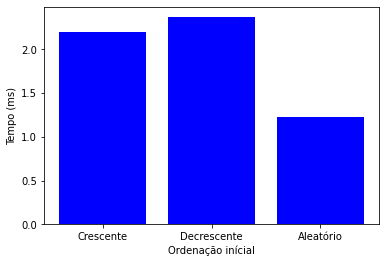


Tempos para arranjos aleatórios, decrescentes e crescentes, de pequenos à grandes, aumentando de 5 em 5:



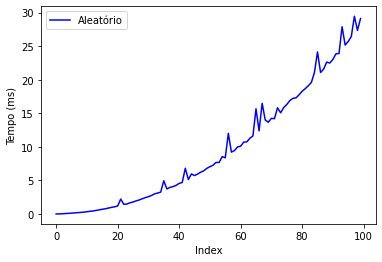

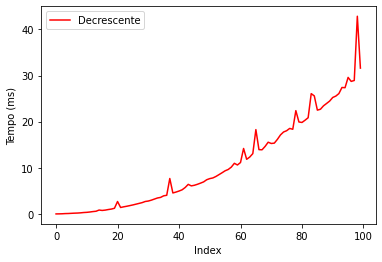

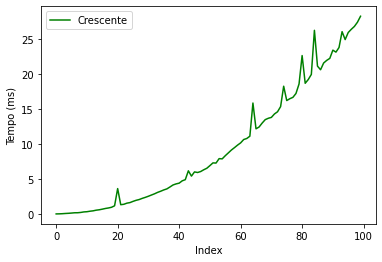


Grafico das medias de tempos da ordenação de arranjos pequenos e grandes em casos de ordenação inícial aleatória, decrescente e crescente:
Media arranjos crescentes: 9.5588326454 ms
Media arranjos decrescentes: 10.6468033791 ms
Media arranjos aleatórios: 9.6508717537 ms



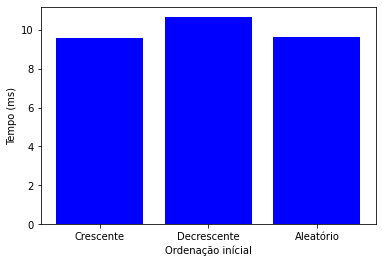

In [40]:
analisaAlgoritmo(selectionSort)

### Analise do Insertion Sort

Dando como pior caso um arranjo decrescente, o melhor caso um arranjo crescente, temos que em um teste com arranjos de 100 elementos, entre o pior e melhor caso, temos a diferença entre os tempos de 3.0989646911 ms. No pior caso temos um número de 4941 interações, já em um caso de arranjo aleatório foi de 2395, com diferença de tempo de 2.1743774414 ms. Isso mostra que possívelmente, quanto mais ordenado for o arranjo, menor vai ser o tempo de ordenação no Insertion Sort.

Realizando um teste para varios arranjos, crescendo o tamanho deles de 5 em 5, em um loop de 100, temos que a media dos tempos para crescente é bem menor que as demais, para aleatorio fica mais entre a media dos demais casos.

Assintoticamente, o algoritmo tem Ω e Θ diferentes.

Arranjo crescente (100 elementos): [ 18  32  37  39  44  50  50  82  86  86  89 101 106 139 139 145 149 155
 189 189 198 201 201 223 255 256 262 278 282 308 310 316 333 334 335 343
 350 369 381 389 404 409 419 429 433 447 449 466 475 479 488 508 523 526
 526 532 551 584 603 605 606 613 614 640 652 656 665 671 680 680 689 697
 704 708 713 812 817 818 824 825 829 830 842 854 860 868 871 872 873 875
 890 891 892 895 903 919 920 976 977 986]

Arranjo ordenado: [ 18  32  37  39  44  50  50  82  86  86  89 101 106 139 139 145 149 155
 189 189 198 201 201 223 255 256 262 278 282 308 310 316 333 334 335 343
 350 369 381 389 404 409 419 429 433 447 449 466 475 479 488 508 523 526
 526 532 551 584 603 605 606 613 614 640 652 656 665 671 680 680 689 697
 704 708 713 812 817 818 824 825 829 830 842 854 860 868 871 872 873 875
 890 891 892 895 903 919 920 976 977 986]

O tempo gasto para ordenação foi de 0.0691413879 milisegundos
O número de interações foi de 0

Arranjo decrescente (100 elementos):

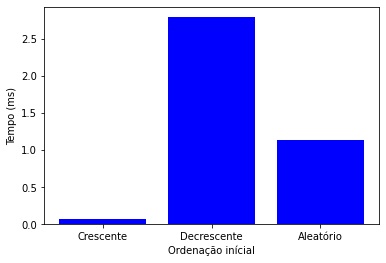


Tempos para arranjos aleatórios, decrescentes e crescentes, de pequenos à grandes, aumentando de 5 em 5:



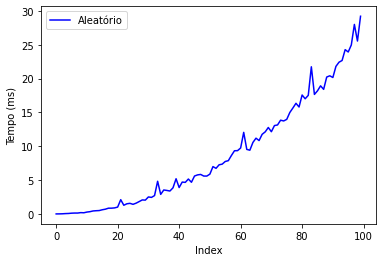

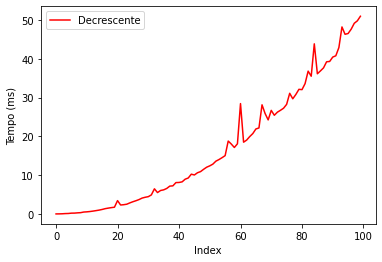

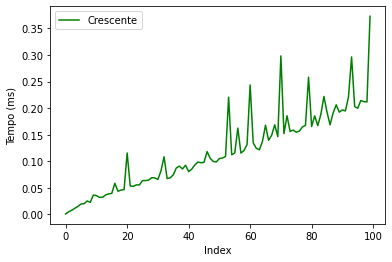


Grafico das medias de tempos da ordenação de arranjos pequenos e grandes em casos de ordenação inícial aleatória, decrescente e crescente:
Media arranjos crescentes: 0.1192116737 ms
Media arranjos decrescentes: 17.1011686325 ms
Media arranjos aleatórios: 8.6983823776 ms



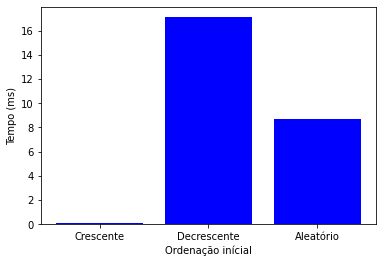

In [41]:
analisaAlgoritmo(insertionSort)

### Analise do Merge Sort

Realizando um teste para varios arranjos, crescendo o tamanho deles de 5 em 5, em um loop de 100, temos que a media dos tempos para crescente e para decrescentes foram bem parecidas.

Assintoticamente, o algoritmo tem Ω e O parecidos, Θ com acima.

Arranjo crescente (100 elementos): [ 19  25  28  29  35  59  75  79  85 127 134 155 163 167 177 182 183 213
 225 233 240 245 246 252 263 284 298 306 320 323 326 329 333 340 346 363
 378 389 401 421 434 445 448 486 494 499 503 503 509 523 529 530 531 534
 551 553 570 579 586 610 613 638 663 664 677 689 715 720 739 744 745 764
 765 773 782 783 796 800 800 807 808 815 822 834 844 853 866 867 870 886
 904 923 924 929 931 932 962 983 984 993]

Arranjo ordenado: [ 19  25  28  29  35  59  75  79  85 127 134 155 163 167 177 182 183 213
 225 233 240 245 246 252 263 284 298 306 320 323 326 329 333 340 346 363
 378 389 401 421 434 445 448 486 494 499 503 503 509 523 529 530 531 534
 551 553 570 579 586 610 613 638 663 664 677 689 715 720 739 744 745 764
 765 773 782 783 796 800 800 807 808 815 822 834 844 853 866 867 870 886
 904 923 924 929 931 932 962 983 984 993]

O tempo gasto para ordenação foi de 0.8349418640 milisegundos
O número de interações foi de 672

Arranjo decrescente (100 elementos

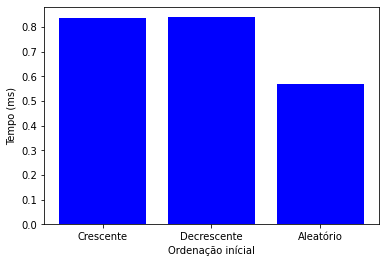


Tempos para arranjos aleatórios, decrescentes e crescentes, de pequenos à grandes, aumentando de 5 em 5:



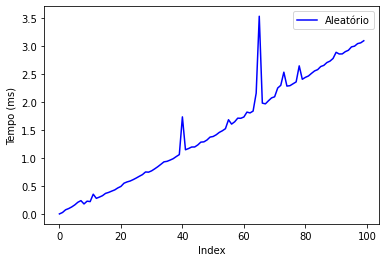

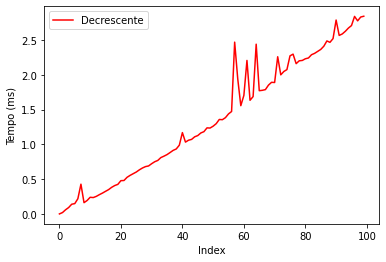

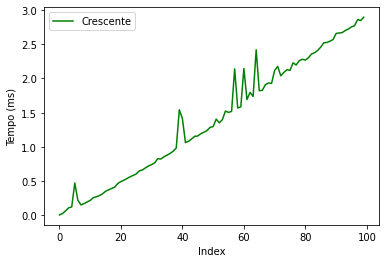


Grafico das medias de tempos da ordenação de arranjos pequenos e grandes em casos de ordenação inícial aleatória, decrescente e crescente:
Media arranjos crescentes: 1.3995838165 ms
Media arranjos decrescentes: 1.3704156876 ms
Media arranjos aleatórios: 1.4952158928 ms



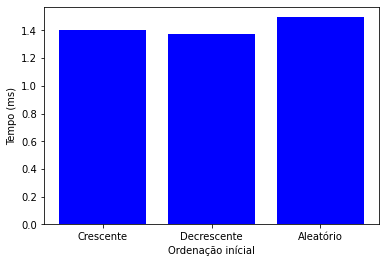

In [43]:
analisaAlgoritmo(mergeSort)

### Analise do Bubble Sort

Realizando um teste para varios arranjos, crescendo o tamanho deles de 5 em 5, em um loop de 100, temos que a media dos tempos para crescente é bem menor que as demais, para aleatorio fica mais entre a media dos demais casos.

Assintoticamente, o algoritmo tem Ω e Θ diferentes.

Arranjo crescente (100 elementos): [  9  48  52  58  63  66  77  88 102 136 146 146 150 155 159 171 211 221
 226 234 243 278 306 307 327 328 336 343 391 391 409 413 423 432 435 442
 449 466 473 475 481 482 488 512 513 530 545 568 584 606 612 612 613 618
 642 643 647 650 656 660 693 698 699 706 709 724 728 733 749 759 760 766
 769 781 802 808 814 823 845 847 850 865 871 879 887 888 891 904 905 915
 918 925 930 931 933 935 942 969 974 986]

Arranjo ordenado: [  9  48  52  58  63  66  77  88 102 136 146 146 150 155 159 171 211 221
 226 234 243 278 306 307 327 328 336 343 391 391 409 413 423 432 435 442
 449 466 473 475 481 482 488 512 513 530 545 568 584 606 612 612 613 618
 642 643 647 650 656 660 693 698 699 706 709 724 728 733 749 759 760 766
 769 781 802 808 814 823 845 847 850 865 871 879 887 888 891 904 905 915
 918 925 930 931 933 935 942 969 974 986]

O tempo gasto para ordenação foi de 2.1753311157 milisegundos
O número de interações foi de 0

Arranjo decrescente (100 elementos):

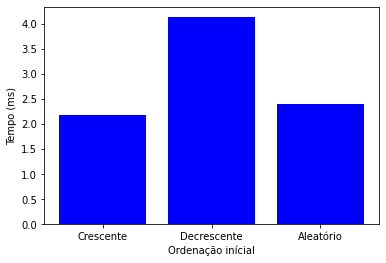


Tempos para arranjos aleatórios, decrescentes e crescentes, de pequenos à grandes, aumentando de 5 em 5:



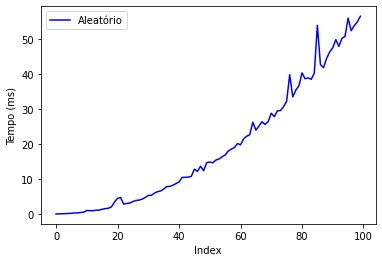

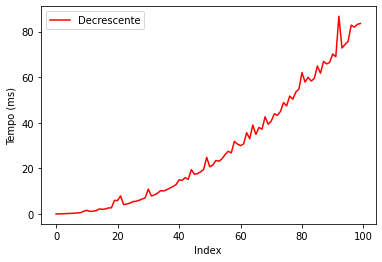

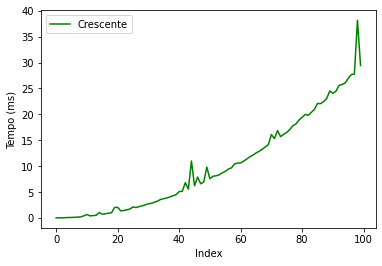


Grafico das medias de tempos da ordenação de arranjos pequenos e grandes em casos de ordenação inícial aleatória, decrescente e crescente:
Media arranjos crescentes: 10.0852322578 ms
Media arranjos decrescentes: 28.6282849312 ms
Media arranjos aleatórios: 19.2259001732 ms



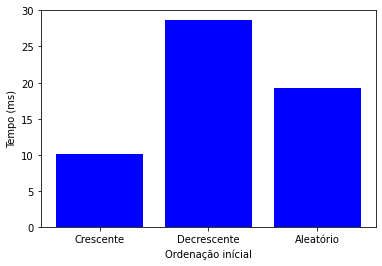

In [44]:
analisaAlgoritmo(bubbleSort)

### Analise do Heap Sort

Realizando um teste para varios arranjos, crescendo o tamanho deles de 5 em 5, em um loop de 100, temos que a media dos tempos foram proximas, sendo a media do caso decrescente, menor.

Assintoticamente, o algoritmo tem comportamento Θ.

Arranjo crescente (100 elementos): [  1   6  14  32  41  45  45  50  72  86 109 117 120 128 130 130 138 143
 158 171 179 184 206 222 226 227 237 244 247 275 275 277 279 284 285 306
 308 311 318 330 332 334 340 343 365 369 387 390 399 429 460 464 471 490
 503 522 524 525 530 541 567 572 579 581 605 624 642 664 665 671 688 692
 706 730 730 738 738 755 761 764 777 823 839 840 853 862 864 871 873 877
 881 912 915 920 923 925 926 951 959 959]

Arranjo ordenado: [  1   6  14  32  41  45  45  50  72  86 109 117 120 128 130 130 138 143
 158 171 179 184 206 222 226 227 237 244 247 275 275 277 279 284 285 306
 308 311 318 330 332 334 340 343 365 369 387 390 399 429 460 464 471 490
 503 522 524 525 530 541 567 572 579 581 605 624 642 664 665 671 688 692
 706 730 730 738 738 755 761 764 777 823 839 840 853 862 864 871 873 877
 881 912 915 920 923 925 926 951 959 959]

O tempo gasto para ordenação foi de 0.7343292236 milisegundos
O número de interações foi de 0

Arranjo decrescente (100 elementos):

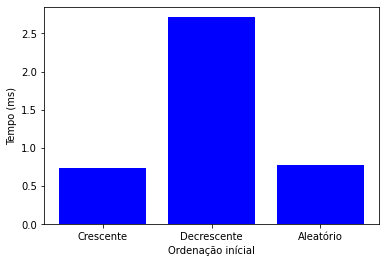


Tempos para arranjos aleatórios, decrescentes e crescentes, de pequenos à grandes, aumentando de 5 em 5:



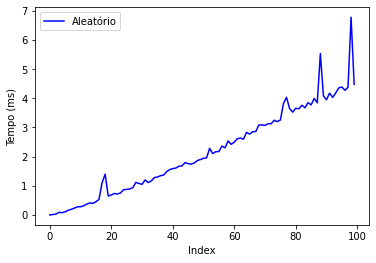

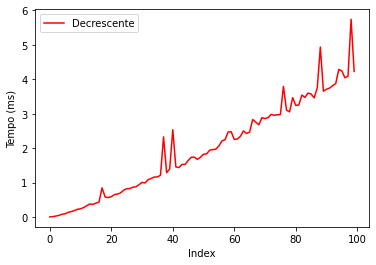

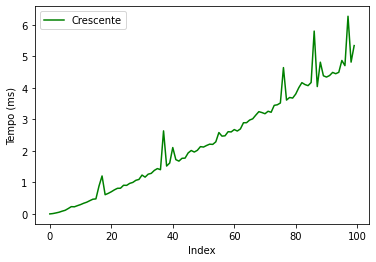


Grafico das medias de tempos da ordenação de arranjos pequenos e grandes em casos de ordenação inícial aleatória, decrescente e crescente:
Media arranjos crescentes: 2.3049664497 ms
Media arranjos decrescentes: 1.9840264320 ms
Media arranjos aleatórios: 2.1509075165 ms



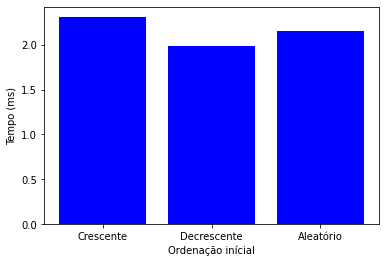

In [45]:
analisaAlgoritmo(heapSort)

### Analise do Quick Sort

Realizando um teste para varios arranjos, crescendo o tamanho deles de 5 em 5, em um loop de 100, temos que a media dos tempo foram invertidas em comparação com os algoritmos anteriores, sendo maior para os casos crescentes e menores para os aleatórios, com os decrescentes mais ao meio dos demais.

Assintoticamente, o algoritmo tem comportamento Θ.

Arranjo crescente (100 elementos): [ 12  32  38  38  59  60  70  81  96 111 135 137 146 151 153 162 164 165
 173 183 191 202 212 231 238 251 259 266 271 274 298 299 310 313 324 324
 327 336 336 339 343 390 392 403 413 438 489 492 495 510 515 523 530 530
 532 540 550 552 553 556 560 573 583 626 627 635 639 640 649 651 665 668
 682 693 719 747 754 760 790 795 798 805 805 808 843 847 850 863 880 897
 916 938 959 961 980 982 996 997 999 999]

Arranjo ordenado: [ 12  32  38  38  59  60  70  81  96 111 135 137 146 151 153 162 164 165
 173 183 191 202 212 231 238 251 259 266 271 274 298 299 310 313 324 324
 327 336 336 339 343 390 392 403 413 438 489 492 495 510 515 523 530 530
 532 540 550 552 553 556 560 573 583 626 627 635 639 640 649 651 665 668
 682 693 719 747 754 760 790 795 798 805 805 808 843 847 850 863 880 897
 916 938 959 961 980 982 996 997 999 999]

O tempo gasto para ordenação foi de 3.0577182770 milisegundos
O número de interações foi de 0

Arranjo decrescente (100 elementos):

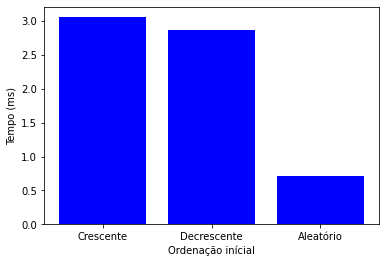


Tempos para arranjos aleatórios, decrescentes e crescentes, de pequenos à grandes, aumentando de 5 em 5:



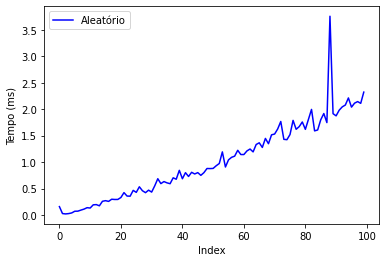

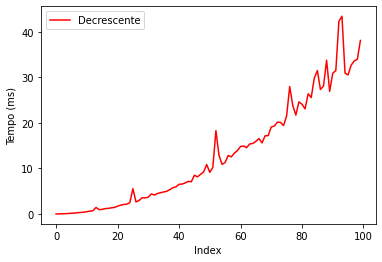

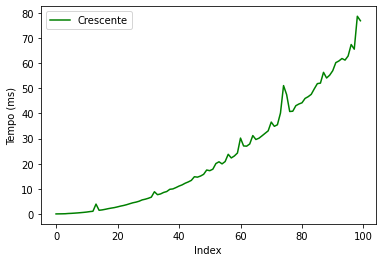


Grafico das medias de tempos da ordenação de arranjos pequenos e grandes em casos de ordenação inícial aleatória, decrescente e crescente:
Media arranjos crescentes: 23.6839723587 ms
Media arranjos decrescentes: 12.9388570786 ms
Media arranjos aleatórios: 1.0202312469 ms



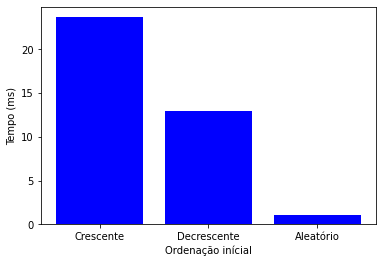

In [46]:
import sys
sys.setrecursionlimit(1500)

analisaAlgoritmo(quickSort)